In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
# Import database and translate to English:

df = pd.read_csv("precipitation_barcelona.csv")

EN_names = {"Any" : "Year", "Mes" : "Month", "Desc_Mes" : "Month_CA", "Precipitacions" : "Precipitation"}

df.rename(columns= EN_names, inplace=True)

In [3]:
df2 = pd.read_csv("temperature_barcelona.csv")

EN_names2 = {"Any" : "Year", "Mes" : "Month", "Desc_Mes" : "Month_CA", "Temperatura" : "Temperature"}

df2.rename(columns= EN_names2, inplace=True)

In [4]:
new_thing = df2[df2["Year"] > 1785]

df["Temperature"] = new_thing["Temperature"].copy()

df.dropna(inplace=True)

df.drop("Month_CA", axis=1, inplace=True)

In [5]:
# Get 10 rainiest months ever:

df.sort_values(by="Precipitation", ascending=False, inplace=True)

df.head(10)

# Rainiest months even have been Autumn months (September to December)

,Year,Month,Precipitation,Temperature
2231,1971,12,365.8,9.3
1076,1875,9,338.5,20.6
2374,1983,11,330.4,11.7
1041,1872,10,328.6,15.1
2421,1987,10,325.4,16.8
1630,1921,11,289.2,10.2
920,1862,9,285.6,18.8
2157,1965,10,285.1,14.9
2084,1959,9,284.5,20.7
1989,1951,10,281.1,17.2


In [6]:
# Get 10 hottest and months ever:

df.sort_values(by="Temperature", ascending=False, inplace=True)

df.head(10)

# Global warming is real

,Year,Month,Precipitation,Temperature
2683,2009,8,0.4,28.5
2718,2012,7,21.9,27.1
1255,1890,8,82.6,26.4
2755,2015,8,41.0,26.3
2682,2009,7,45.0,26.1
2791,2018,8,36.5,26.0
2574,2000,7,1.9,25.9
2442,1989,7,3.7,25.8
2575,2000,8,13.7,25.7
1782,1934,7,0.2,25.7


In [7]:
df.sort_values(by="Temperature", ascending=True, inplace=True)

df.head(10)

# Most of the coldest months ever are in the XIXth Century

,Year,Month,Precipitation,Temperature
2113,1962,2,77.2,2.5
816,1854,1,12.4,3.4
264,1808,1,4.9,3.6
600,1836,1,35.0,4.1
2460,1991,1,41.8,4.3
1980,1951,1,56.8,4.3
1103,1877,12,26.2,4.4
420,1821,1,37.3,4.4
877,1859,2,10.9,4.5
1092,1877,1,2.3,4.6


In [8]:
# Get monthly rain distribution:

df["Precipitation"].describe()

# Big difference between third and fourth quartile: very rainy months get very rainy in comparison to the rest of 
# the year

count    2748.000000
mean       49.302511
std        45.084442
min         0.000000
25%        16.900000
50%        37.600000
75%        68.825000
max       365.800000
Name: Precipitation, dtype: float64

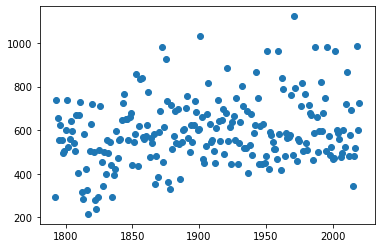

In [9]:
# Show total rain per year

by_year = df[["Year", "Precipitation"]]

added = by_year.groupby("Year").aggregate(sum)

plt.scatter(x=added.index, y=added["Precipitation"])

# Aparently the overall level of rain is higher than it used to be in the XIXth century

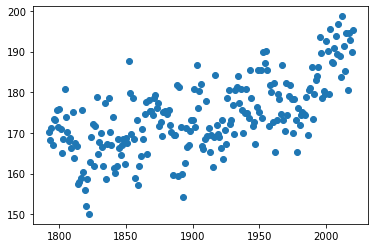

In [10]:
# Show total temperature per year

by_year_t = df[["Year", "Temperature"]]

added_t = by_year_t.groupby("Year").aggregate(sum)

plt.scatter(x=added_t.index, y=added_t["Temperature"])

# Temperatures in the last century, especially after the 1970s/80s, have augmented dramatically

In [11]:
# Get rainiest years ever

added.sort_values(by="Precipitation", ascending=False, inplace=True)

added.head(10)

# 1971, 1901 and 2018 are the rainiest years on record. Most of the top 10 years are after 1950

,Precipitation
Year,
1971,1122.7
1901,1030.6
2018,988.0
1996,982.4
1987,982.3
1872,980.0
1951,964.7
1959,963.8
2002,963.5


In [12]:
added["Precipitation"].describe()

# In terms of years, the distribution is quite more regular than in terms of months

count     229.000000
mean      591.630131
std       152.884434
min       215.600000
25%       497.600000
50%       573.000000
75%       676.600000
max      1122.700000
Name: Precipitation, dtype: float64

<BarContainer object of 12 artists>

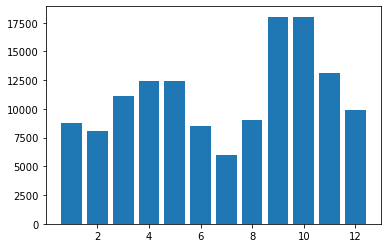

In [13]:
# Accumulated records per month

by_month = df[["Month", "Precipitation"]]

added_m = by_month.groupby("Month").aggregate(sum)

plt.bar(x = added_m.index, height = added_m["Precipitation"])

# Acculmulated rain per month: very seasonal, Fall is the rainiest, followed by Spring, then Winter and finally 
# Summer. Overall, July is the driest month, September/October the wettest

<BarContainer object of 12 artists>

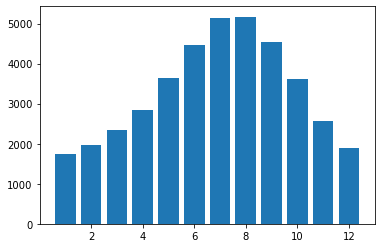

In [14]:
# Accumulated temperature per month

by_month = df[["Month", "Temperature"]]

added_m = by_month.groupby("Month").aggregate(sum)

plt.bar(x = added_m.index, height = added_m["Temperature"])

# The peak temperature happens in August and the lowest 

In [15]:
# Save as SQL table:

conn = sqlite3.connect('test_database')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS BCN_Hist_Precipitation (year number, month number, month_ca text, precipitation number)')
conn.commit()

df.to_sql("BCN_Hist_Precipitation.sql", conn, if_exists='replace', index = False)

In [16]:
df.to_csv("Temp+Prec")